# Stock_Price EDA:

### Overview:

#### S&P 500 is an stock maetket index that measures the stock proformance of 500 large xompanies listed on USA stock exchange 

***Requirments:***

1. Analyse the closing prise of all the trading stock
2. Analyse the total volume of stock traded on each day
3. Analyse the Daily price change in stock
4. Analyse the monthly mean of close feature
5. Analyze the stock prices of stock comapnies are corelated to each other
6. Analyse the Daily return of each stock and define how they are corelated to each other
7. Define the value at risk Analysis for teach companies

In [1]:
# First we have to import the Librs:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# NOw the senario is we have many over 500 stock data sets to analyze but for this analyzation we will only use top 4 
# Companies like google, Amazone, Apple, Microsoft.

path = "/Users/ahmad/Data Science BootCamp with Python/Data Analysis Projects\Projects/2-Time Series Data Analysis/individual_stocks_5yr"
company_list = ['AAPL_data.csv', 'GOOG_data.csv', 'MSFT_data.csv', 'AMZN_data.csv']

# Blank a DataFrame

all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(path+"/"+file)
    all_data = pd.concat([all_data, current_df])

all_data.shape

(4752, 7)

In [3]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [4]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [5]:
# As we know the date data type is object so we have to convert it fist into date and time.

all_data["date"]= pd.to_datetime(all_data["date"])

In [6]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

### Analyse the closing price of all the trading stocks

In [7]:
teach_list = all_data["Name"].unique()
teach_list

array(['AAPL', 'GOOG', 'MSFT', 'AMZN'], dtype=object)

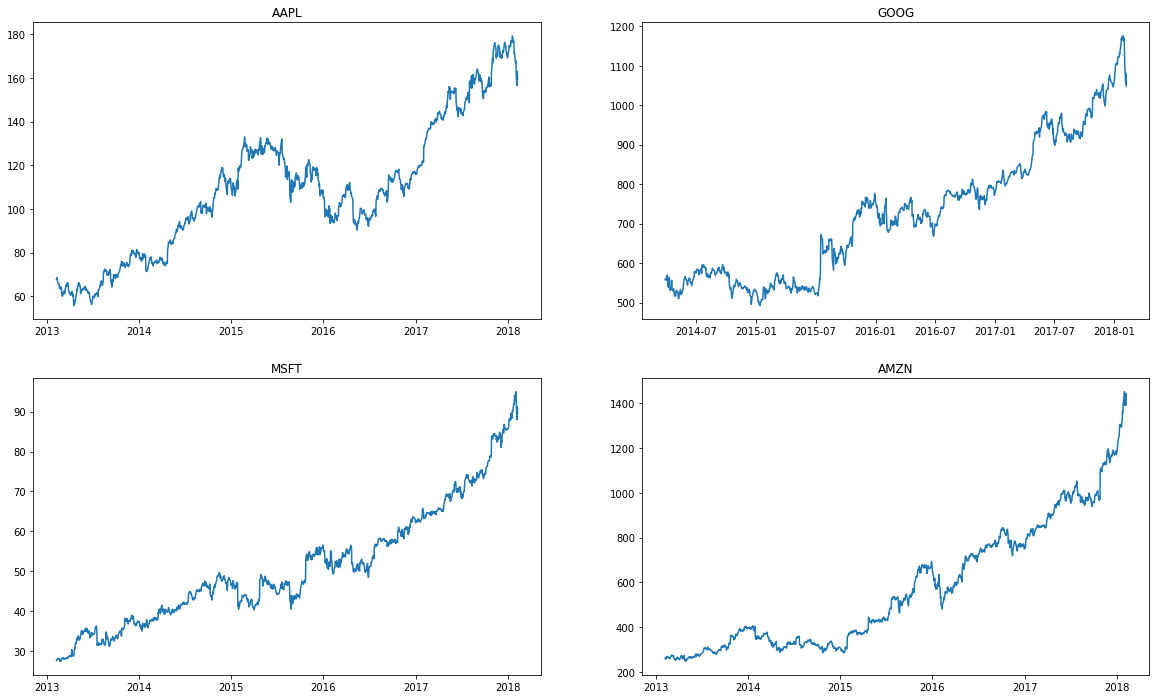

In [8]:
plt.figure(figsize = (20,12))
for i, company in enumerate(teach_list,1):
    plt.subplot(2,2,i)
    df = all_data[all_data["Name"]==company]
    plt.plot(df["date"],df["close"])
    #plt.xticks(rotation = "vertical") # this used for vertical x-baxis 
    plt.title(company)

### Analyse the total volume of stock traded on each day

In [9]:
# For this we have to use the plotly:
!pip install plotly --upgrade
import plotly.express as px

Requirement already up-to-date: plotly in c:\programdata\anaconda3\lib\site-packages (5.3.1)


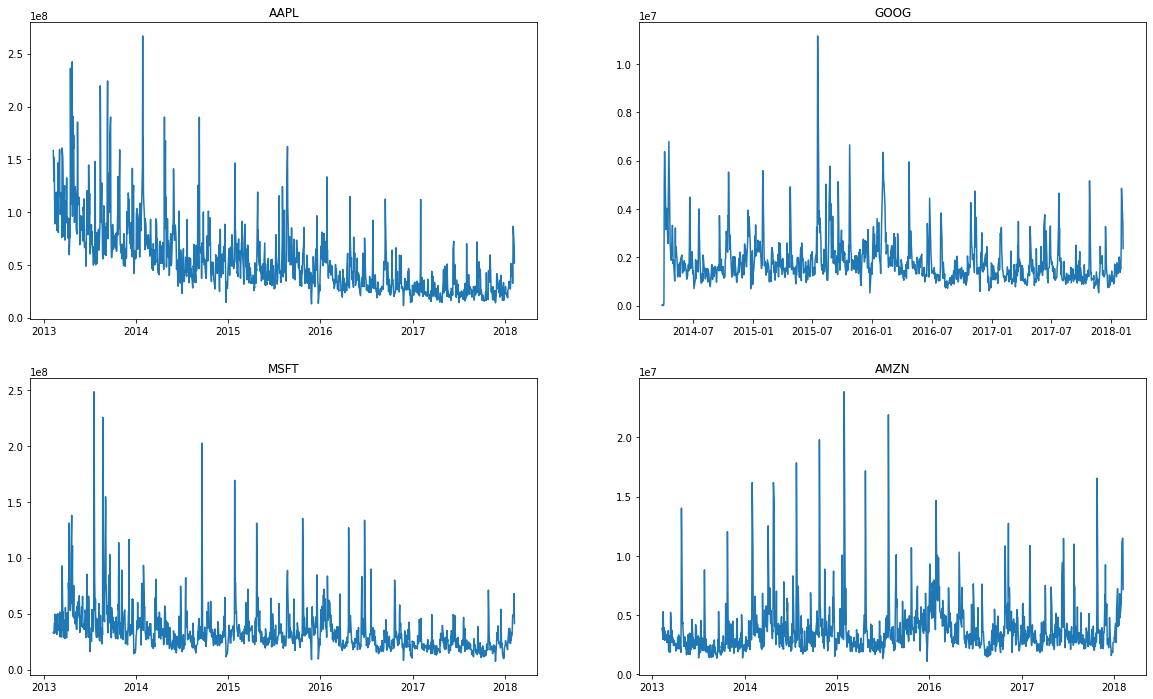

In [10]:
# First with the same way to plot this:
# As we have seen with this way we didn't the indepth analyze of trading volume between years: 
plt.figure(figsize=(20,12))
for i, company in enumerate(teach_list,1):
    plt.subplot(2, 2, i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['volume'])
    plt.title(company)


In [14]:
# Now we will use the plotly for in depth analysis:
for company in teach_list:
    df=all_data[all_data['Name']==company]
    fig = px.line(df, x = "date", y = "volume", title = company)
    fig.show()
    
    

### Analyse the Daily price change in stock

##### Daily Stock Return Formula
To calculate how much you gained or lost per day for a stock, subtract the opening price from the closing price. Then, multiply the result by the number of shares you own in the company. 

In [17]:
# For the daily price chanege we have to analyse the Apple dataset:
df = pd.read_csv("/Users/ahmad/Data Science BootCamp with Python/Data Analysis Projects\Projects/2-Time Series Data Analysis/individual_stocks_5yr/AAPL_data.csv")

In [18]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


###### Percentage Return

In [34]:
df["Daily_Price_chnage"] = df["close"] - df["open"]
df.head()

,date,open,high,low,close,volume,Name,1day % return,Daily_Price_chnage
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.206325,0.1400
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.714688,0.4900
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.481344,-1.6586
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.042869,-0.0286
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.443624,0.2957


In [35]:
df['1day % return']=((df['close']-df['open'])/df['close'])*100
df.head()

,date,open,high,low,close,volume,Name,1day % return,Daily_Price_chnage
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.206325,0.1400
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.714688,0.4900
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.481344,-1.6586
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.042869,-0.0286
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.443624,0.2957


In [36]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name',
       '1day % return', 'Daily_Price_chnage'],
      dtype='object')

##### Using plotly to visualise data

In [37]:
fig = px.line(df, x = "date", y = '1day % return',title = "Daily Price Analysis")
fig.show()

##### using matplotlib for visualisation

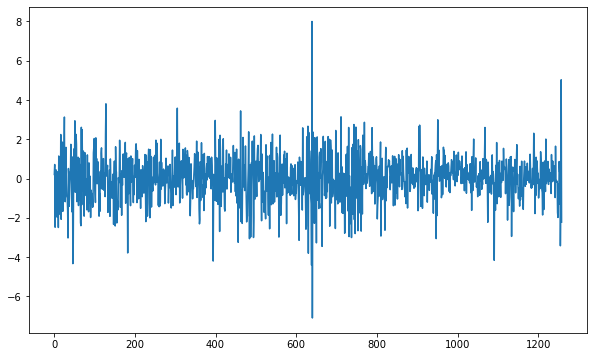

In [38]:
plt.figure(figsize=(10,6))
df['1day % return'].plot()

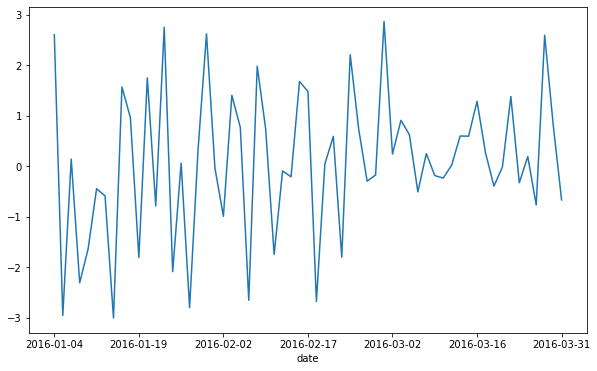

In [25]:
#we can also analyse the specific part of graph for lets say between some interval the in plotly it can easly found
#but if any case we have to built it thoroughly thn:
plt.figure(figsize=(10,6))
df.set_index('date')['2016-01-01':'2016-03-31']['1day % return'].plot()
#plt.xticks(rotation='vertical')


##### Analyse the monthly mean of close feature

In [28]:
# As we have to analyse the mean so we will use the same apple dataset:
df2 = df.copy()

In [29]:
df2.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
Daily_Price_chnage    float64
1day % return         float64
dtype: object

In [31]:
# so the date column is object we have to convert this into datetime:
df2["date"] = pd.to_datetime(df2["date"])

In [32]:
df2.dtypes

date                  datetime64[ns]
open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
Name                          object
Daily_Price_chnage           float64
1day % return                float64
dtype: object

In [35]:
df2.set_index("date", inplace = True)

In [36]:
df2.head()

,open,high,low,close,volume,Name,Daily_Price_chnage,1day % return
date,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [44]:
df2["2013-02-08": "2013-02-14"]

,open,high,low,close,volume,Name,Daily_Price_chnage,1day % return
date,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


##### Resampling close column Month wise

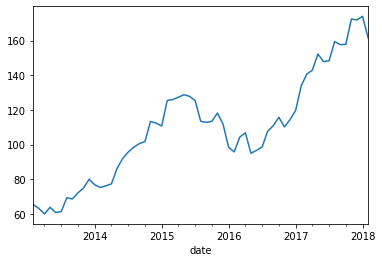

In [45]:
df2['close'].resample('M').mean().plot()

##### Resampling close column year wise

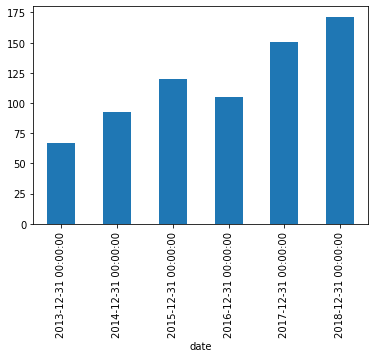

In [47]:
df2['close'].resample('Y').mean().plot(kind = "bar")

### Analyze the stock prices of stock comapnies are corelated to each other

###### For this Analaysis we have to read all the 4 datasets of companies include AMZ, Microsoft, Apple, Google.

###### Reading data of tech companies

In [51]:
appl=pd.read_csv("/Users/ahmad/Data Science BootCamp with Python/Data Analysis Projects\Projects/2-Time Series Data Analysis/individual_stocks_5yr/AAPL_data.csv")
appl.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [53]:
google=pd.read_csv("/Users/ahmad/Data Science BootCamp with Python/Data Analysis Projects\Projects/2-Time Series Data Analysis/individual_stocks_5yr/GOOG_data.csv")
google.head()

,date,open,high,low,close,volume,Name
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG


In [54]:
amzn=pd.read_csv("/Users/ahmad/Data Science BootCamp with Python/Data Analysis Projects\Projects/2-Time Series Data Analysis/individual_stocks_5yr//AMZN_data.csv")
amzn.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [55]:
msft=pd.read_csv("/Users/ahmad/Data Science BootCamp with Python/Data Analysis Projects\Projects/2-Time Series Data Analysis/individual_stocks_5yr/MSFT_data.csv")
msft.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


###### create a blank dataframe

In [57]:
close=pd.DataFrame()

In [58]:
close['appl']=appl['close']
close['google']=google['close']
close['amzn']=amzn['close']
close['msft']=msft['close']

In [59]:
close.head()

,appl,google,amzn,msft
0,67.8542,558.46,261.95,27.55
1,68.5614,559.99,257.21,27.86
2,66.8428,556.97,258.70,27.88
3,66.7156,567.16,269.47,28.03
4,66.6556,567.00,269.24,28.04


### Multi-variate Analysis

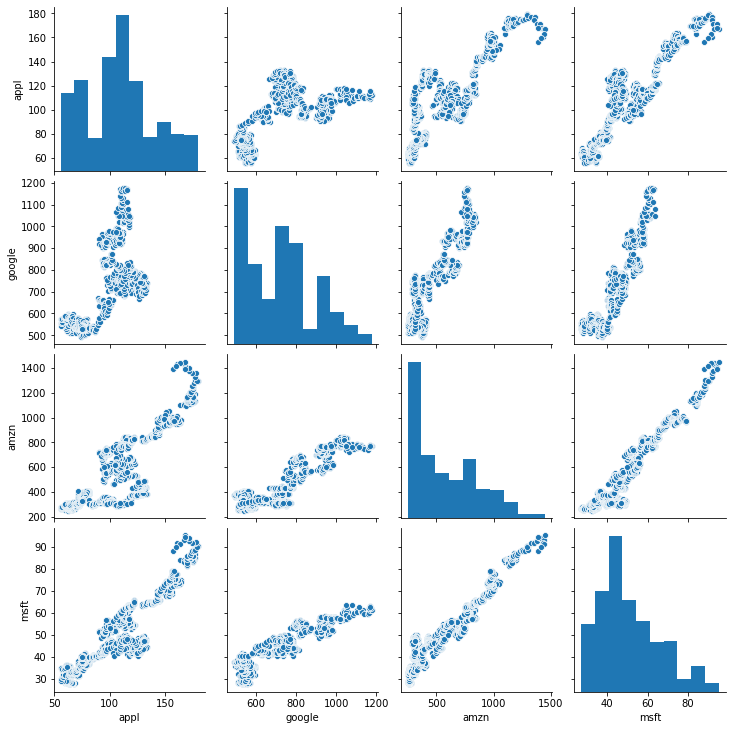

In [61]:
import seaborn as sns
sns.pairplot(data=close)

### co-relation plot for stock prices

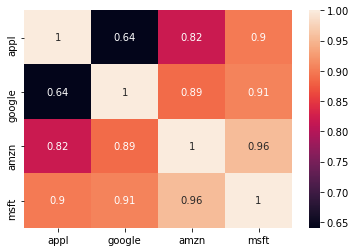

In [63]:
sns.heatmap(close.corr(),annot=True)

###### Closing price of Google and Microsoft are well correlated
   and Closing price of Amazon and Microsoft have a co-relation of 0.96

### Analyse Daily return of each stock & how they are co-related

In [66]:
data=pd.DataFrame()

In [67]:
data=pd.DataFrame()

In [69]:
data['appl_change']=((appl['close']-appl['open'])/appl['close'])*100
data['goog_change']=((google['close']-google['open'])/google['close'])*100
data['amzn_change']=((amzn['close']-amzn['open'])/amzn['close'])*100
data['msft_change']=((msft['close']-msft['open'])/msft['close'])*100

In [70]:
data.head()

,appl_change,goog_change,amzn_change,msft_change
0,0.206325,-1.708269,0.209964,0.725953
1,0.714688,-0.216075,-2.328836,0.753769
2,-2.481344,-1.781065,-0.189409,0.000000
3,-0.042869,1.489879,2.946525,0.356761
4,0.443624,0.334039,0.694548,0.427960


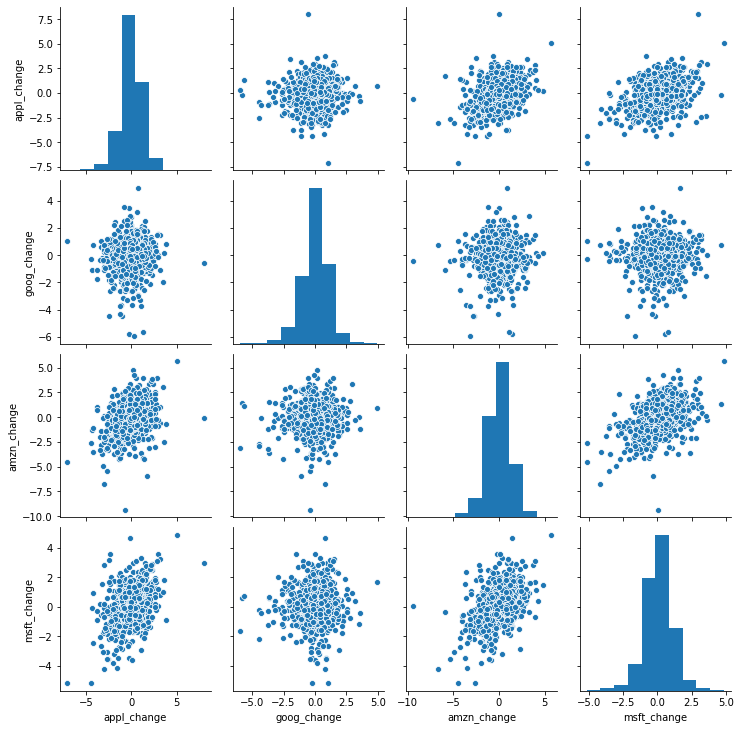

In [71]:
sns.pairplot(data=data)

### Correlation plot for daily returns

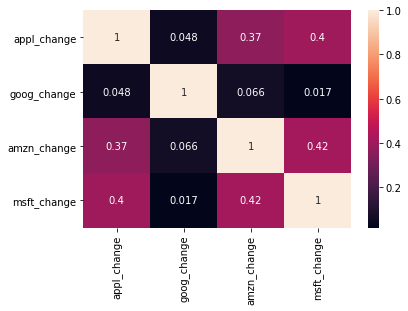

In [73]:
sns.heatmap(data.corr(),annot=True)

###### We can see that Amazon and microsoft have good correlation on daily returns

In [75]:
data.head()

,appl_change,goog_change,amzn_change,msft_change
0,0.206325,-1.708269,0.209964,0.725953
1,0.714688,-0.216075,-2.328836,0.753769
2,-2.481344,-1.781065,-0.189409,0.000000
3,-0.042869,1.489879,2.946525,0.356761
4,0.443624,0.334039,0.694548,0.427960


In [76]:
data.columns

Index(['appl_change', 'goog_change', 'amzn_change', 'msft_change'], dtype='object')

In [77]:
type(data)

pandas.core.frame.DataFrame

### Value at Risk analysis for Apple

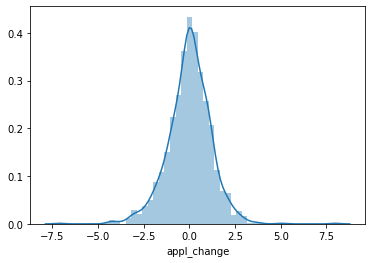

In [79]:
sns.distplot(data['appl_change'])

###### it somehow follows a normal distribution

In [86]:
data['appl_change'].std()

# Like about 68 % of entire data is between -1.1 to 1.1

1.1871377131421237

In [87]:
data['appl_change'].std()*2

# Means about 95 % of entire data is between -2.37 to 2.37

2.3742754262842474

In [88]:
data['appl_change'].std()*3

# Means about 99.7 % of entire data is between -3.5 to 3.5

3.561413139426371

In [82]:
data['appl_change'].quantile(0.1)

-1.4246644227944307

###### 1.4246644227944307 means that 90% of the times the worst daily Loss will not exceed 1.42

In [84]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
appl_change,1259.0,-0.000215,1.187138,-7.104299,-0.658021,0.042230,0.715427,8.000388
goog_change,975.0,-0.012495,1.092560,-5.952266,-0.551963,0.024951,0.672649,4.943550
amzn_change,1259.0,-0.000398,1.358679,-9.363077,-0.738341,-0.002623,0.852568,5.640265
msft_change,1259.0,0.076404,1.059260,-5.177618,-0.509241,0.061069,0.703264,4.861491


## Conslusion:
We have Perfomed the indepth Analysis of all the datasets and coverd up all the questions through EDA.